**Assignment One Part One**

Class Prediction: No
Class Probabilites: {'No': 0.02057142857142857, 'Yes': 0.005291005291005291}


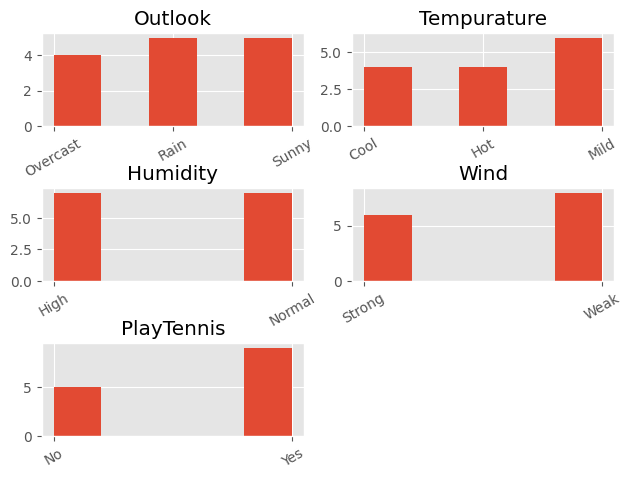

In [48]:
# Import needed modules.
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the assigned dataset.
data = [
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Strong', 'No']
]

# Convert the dataset into a Pandas DataFrame.
df = pd.DataFrame(data, columns=['Outlook', 'Tempurature', 'Humidity', 'Wind', 'PlayTennis'])

# Method to calculate the probabilites of Yes and No for a given input vector and
# return the highest one.
def calculateInputProbabilities(df, inputVector):
  classes = df['PlayTennis'].unique() # Yes/No
  totalRows = len(df) # Total samples
  probabilities = {} # Dictionary to hold the final probabilites.

  # Loop over Yes/No and get their overall probabilites. Then loop over each
  # feature in the input vector and determine its probability related to either Yes/No.
  for cls in classes:
    classRows = len(df[df['PlayTennis'] == cls]) # Get number of rows where PlayTennis = Yes or No.
    classProb = classRows / totalRows # Get the overall ratio of Yes/No (9/14 | 5/14).

    featureProb = 1 # Variable to hold the bayes calculation throughout execution. Set to 1.
    # Loop over the input vector features and determine thier probabilites related to Yes/No.
    for feature, value in inputVector.items():
      # Get the number of rows where the specified feature and value align and the class matches as well.
      featureRows = len(df[(df[feature] == value) & (df['PlayTennis'] == cls)])
      # Calculate the probability. This will essentially multiply the probabilities
      # of each feature/value pair where the final result will then be multiplied by
      # the class probability.
      featureProb *= featureRows / classRows if classRows else 0

    # Determine the final probability of the class (Yes/No) by multiplying the
    # combined feature/value pairs with the overall class probability.
    probabilities[cls] = classProb * featureProb

  # Return the prediction (largest of the two) and the overall results.
  return max(probabilities, key=probabilities.get), probabilities

# Vector we want to make the prediction on.
inputVector = {'Outlook': 'Sunny', 'Tempurature': 'Cool', 'Humidity': 'High', 'Wind': 'Strong'}

# Call the method with a variable for the prediction and a variable for the total results (Yes and No).
predictionClass, totalProbabilites = calculateInputProbabilities(df, inputVector)

# Display Results
print(f"Class Prediction: {predictionClass}")
print(f"Class Probabilites: {totalProbabilites}")

# Utilize LabelEncoder to convert current data into usable numerical values!
labelEncoders = {}
for col in df.columns:
  # Initalize a LabelEncoder for the column.
  le = LabelEncoder()
  # Encode the current values into numeric values.
  df[col] = le.fit_transform(df[col])
  # Store the LabelEncoder that is used so we can encode/decode later on.
  labelEncoders[col] = le

# Display the features using MatPlotLib
# This generates a list of features and their original class labels.
featureLabels = {col: le.classes_ for col, le in labelEncoders.items()}
df.hist(bins=5)
plt.tight_layout()

# Loop through the subplots and update their x-axis labels.
# This grabs the current figure and subplots and a the columns themselves.
for ax, col in zip(plt.gcf().axes, df.columns):
  # Labels to use instead of the numeric values.
  labels = featureLabels[col]
  ax.set_xticks(np.arange(len(labels)))
  ax.set_xticklabels(labels, rotation=30)

plt.show()

**Assignment One Part Two**

Accuracy: 0.6
Class Prediction: No


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


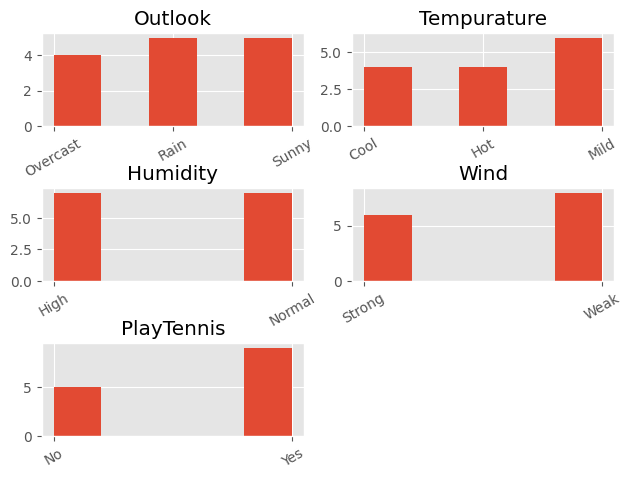

In [49]:
# Import needed modules.
import numpy as np
import pandas as pd
# Needed to transform the inital data into usable numeric data.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the assigned dataset.
data = [
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Strong', 'No']
]

# Convert the dataset into a Pandas DataFrame.
df = pd.DataFrame(data, columns=['Outlook', 'Tempurature', 'Humidity', 'Wind', 'PlayTennis'])

# Utilize LabelEncoder to convert current data into usable numerical values!
labelEncoders = {}
for col in df.columns:
  # Initalize a LabelEncoder for the column.
  le = LabelEncoder()
  # Encode the current values into numeric values.
  df[col] = le.fit_transform(df[col])
  # Store the LabelEncoder that is used so we can encode/decode later on.
  labelEncoders[col] = le

# Prep the data for training and testing.
x = df.drop(columns=['PlayTennis'])
y = df['PlayTennis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the model.
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Run the test data and see how accurate it is.
testPrediction = gnb.predict(x_test)
accuracy = accuracy_score(y_test, testPrediction)
print(f"Accuracy: {accuracy}")

# Input data to predict.
inputVector = [['Sunny', 'Cool', 'High', 'Strong']]

# Encode the input data using the stored LabelEncoders from before.
# This will zip up the x tables column names and the input data into a new list
# where each index is a column and associated value.
# EX: [('Outlook', 'Sunny'), ...]
# These will get assigned to col and val which will then be used to access the
# LabelEncoder for the column and tranform the value.
encodedInputVector = [labelEncoders[col].transform([val])[0] for col, val in zip(x.columns, inputVector[0])]

# Generate a prediction on the input data.
inputVectorPrediction = gnb.predict([encodedInputVector])

# Decode the predicted class using the previously saved LabelEncoder data.
inputVectorPredLabel = labelEncoders['PlayTennis'].inverse_transform(inputVectorPrediction)

print(f"Class Prediction: {inputVectorPredLabel[0]}")

# Display the features using MatPlotLib
# This generates a list of features and their original class labels.
featureLabels = {col: le.classes_ for col, le in labelEncoders.items()}
df.hist(bins=5)
plt.tight_layout()

# Loop through the subplots and update their x-axis labels.
# This grabs the current figure and subplots and a the columns themselves.
for ax, col in zip(plt.gcf().axes, df.columns):
  # Labels to use instead of the numeric values.
  labels = featureLabels[col]
  ax.set_xticks(np.arange(len(labels)))
  ax.set_xticklabels(labels, rotation=30)

plt.show()